# Příklad - spropitné

[Data](http://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html) z roku 1995 o výše spropitného v jedné restauraci v USA

Data obsahují 244 a 7 proměnných:
- Spropitné v dolarech (`tip`)
- Útrata v dolarech (`total_bill`)
- Pohlaví platce účtu (`sex`)
- Jsou ve skupině kuřáci? (`smoker`)
- Den v tydnu (`day`)
- Čas (`time`)
- Velikost skupiny (`size`)


# Data

Závislost spropitného na celkové útratě, dni v tydnu a pohlaví plátce

X: den v týdnu (`day`)

Y: výše spropitného (`tip`)

Barva: pohlaví platce účtu (`sex`)

Velikost bodů: útrata v dolarech (`total_bill`)


In [193]:
# Importování knihoven
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Následujicí řádek je potřeba pro zobrazení matplotlib grafů v Jupyter notebooku
%matplotlib inline 

# Nastavit velikost grafu
sns.set(rc={'figure.figsize':(13, 10)})

In [32]:
# Načtení dat
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Transformace

- Podívat na rozsah dat
- Zjistit, zda proměnné mají chybějící data

In [33]:
# Pro každý sloupec zobrazit popisnou statistiku
data.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [34]:
# Ukázat, které sloupce mají chybějící hodnoty
data.columns[data.isnull().any()]

Index([], dtype='object')

Z popisné statistiky lze vidět, že spojite proměnné mají zhrůba stejný rozsah hodnot. Data neobsahují chybějící hodnoty. Proto alespoň prozatím data nechám v původním stavu.

# Geometrické objekty

Rozhodnout, jaké grafy použit podle toho, jestli chci ukázat:

- Distribuci hodnot jedné proměnné
- Vztah dvou spojitých proměnných
- Vztah kategorické a spojité proměnné
- Vztah dvou kategorických proměnných

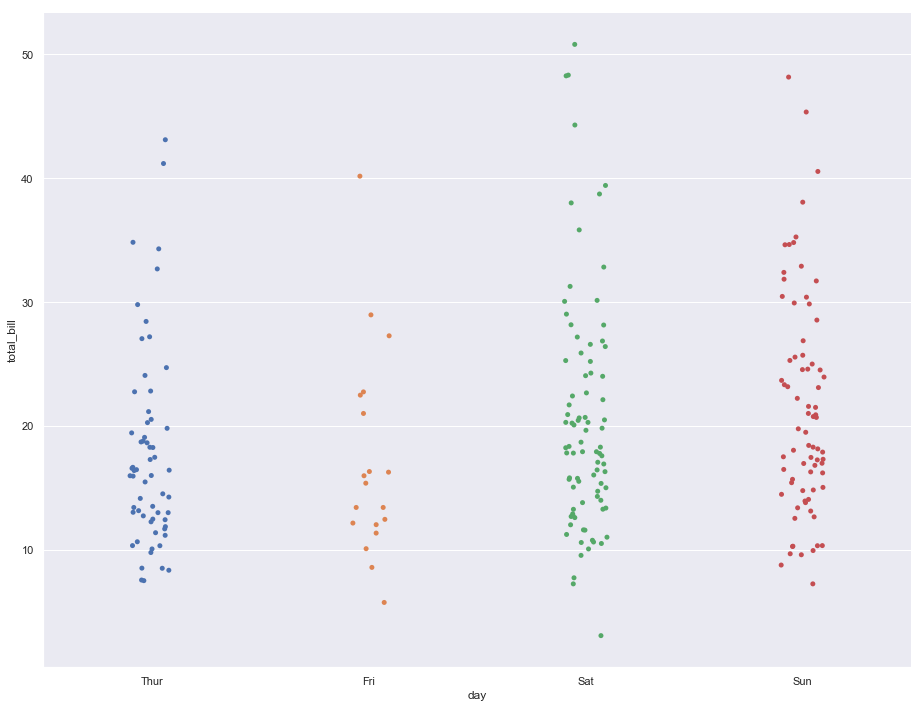

In [61]:
sns.set()
sns.catplot(x="day", y="total_bill", data=data, height=10, aspect=13/10)
plt.show()

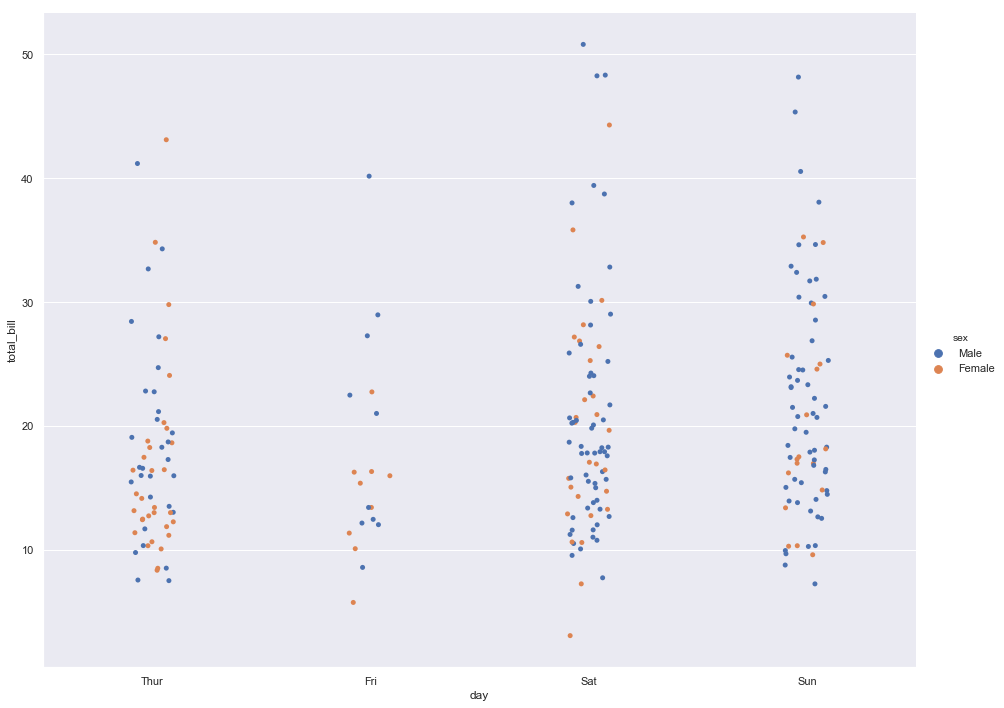

In [125]:
sns.set()
sns.catplot(x='day', y='total_bill', hue='sex', data=data, height=10, aspect=13/10)
plt.show()

In [126]:
data['color'] = ['#486db5' if ele  == 'Male' else '#d24049' for ele in data.sex]
data['total_bill_multiplied'] = (5*data.total_bill)

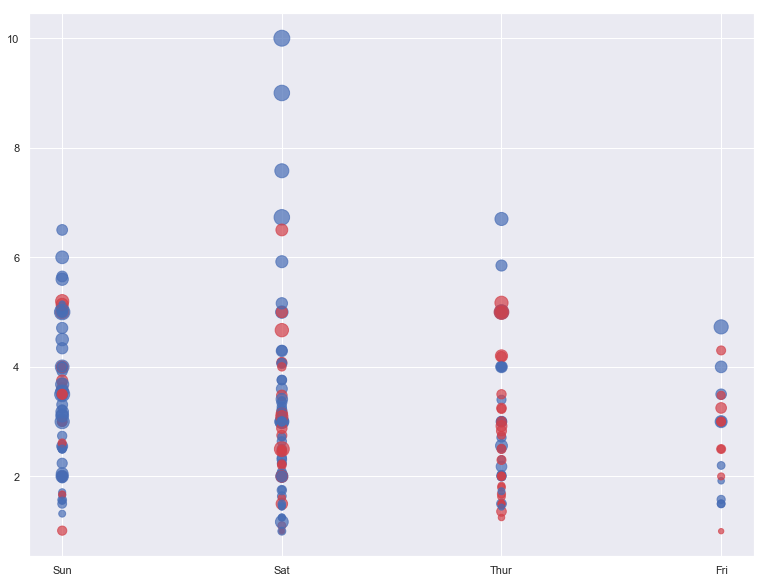

In [127]:
sns.set()
plt.scatter(x="day", y="tip", c='color', s='total_bill_multiplied', data=data, alpha=0.7)
plt.show()

In [130]:
color_map = {'Thur': '#2bae64', 'Fri': '#e98040', 'Sat': '#d24049', 'Sun': '#486db5'}
data['color'] = [color_map[ele] for ele in data.day]
data['marker'] = ['s' if ele  == 'Male' else 'o' for ele in data.sex]

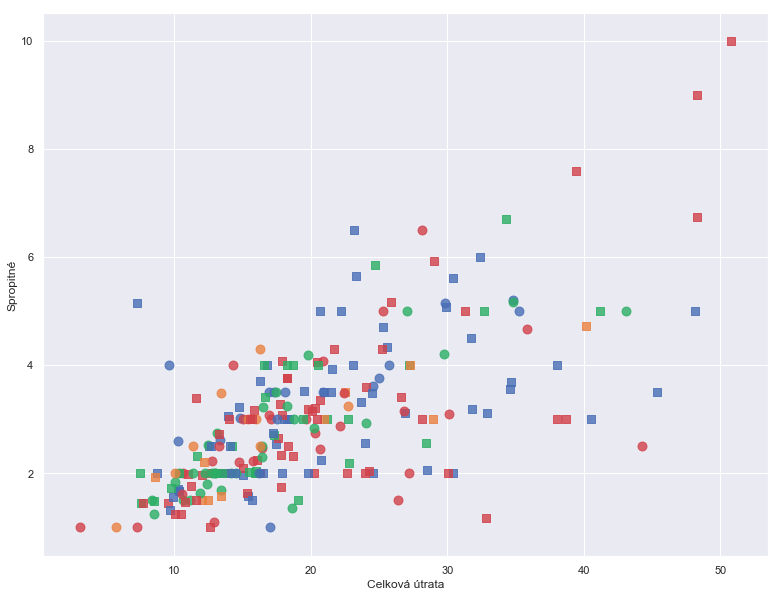

In [163]:
sns.set()
for xp, yp, color, m in zip(data.total_bill, data.tip, data.color.values.tolist(), data.marker.values.tolist()):
    plt.scatter(x=[xp], y=[yp], marker=m, data=data, alpha=0.8, color=color, label=color, s=80)
plt.xlabel('Celková útrata')
plt.ylabel('Spropitné')
plt.show()

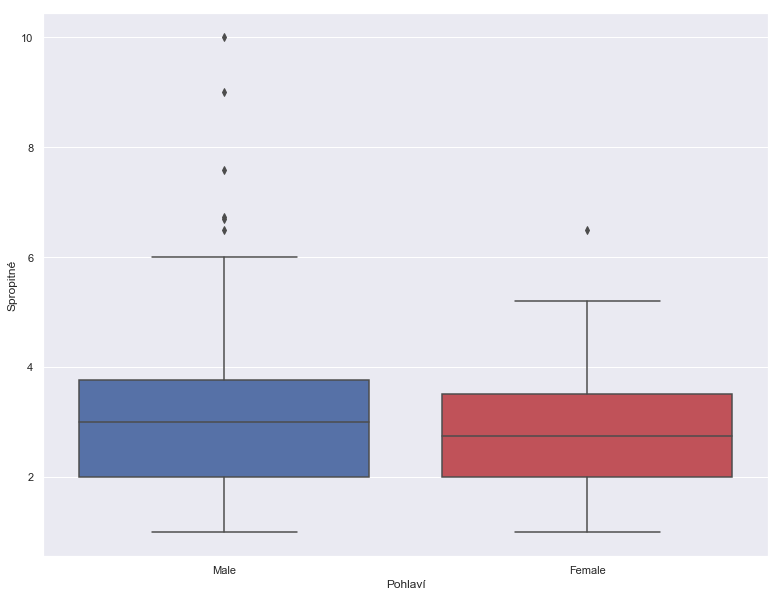

In [189]:
sns.set()
sns.boxplot(x='sex', y='tip', data=data, palette=('#486db5', '#d24049'))
plt.xlabel('Pohlaví')
plt.ylabel('Spropitné')
plt.show()

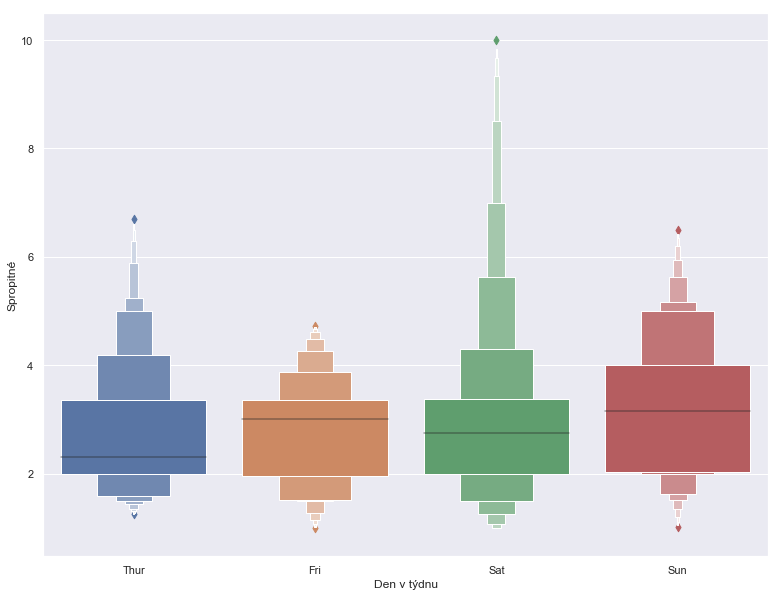

In [195]:
sns.set()
sns.boxenplot(x='day', y='tip', data=data)
plt.xlabel('Den v týdnu')
plt.ylabel('Spropitné')
plt.show()

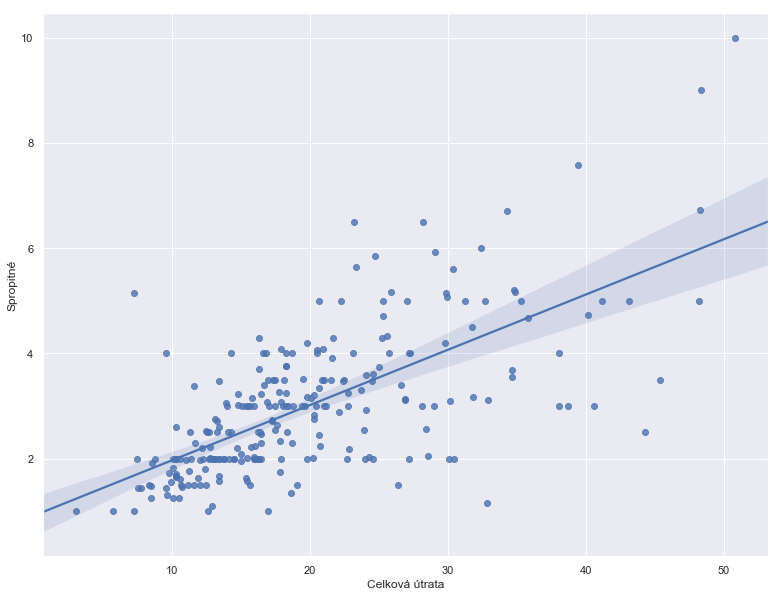

In [192]:
sns.set()
sns.regplot(x='total_bill', y='tip', data=data)
plt.xlabel('Celková útrata')
plt.ylabel('Spropitné')
plt.show()